In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [7]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

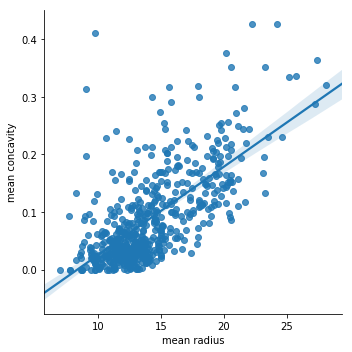

In [19]:
sns.lmplot(x='mean radius',y='mean concavity',data=df)

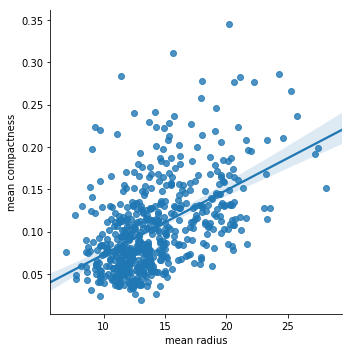

In [20]:
sns.lmplot(x='mean radius',y='mean compactness',data=df)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [11]:
scaled_data = scaler.transform(df)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [13]:
x_pca = pca.transform(scaled_data)

In [14]:
scaled_data.shape

(569, 30)

In [15]:
x_pca.shape

(569, 2)

Text(0,0.5,'Second Principal Component')

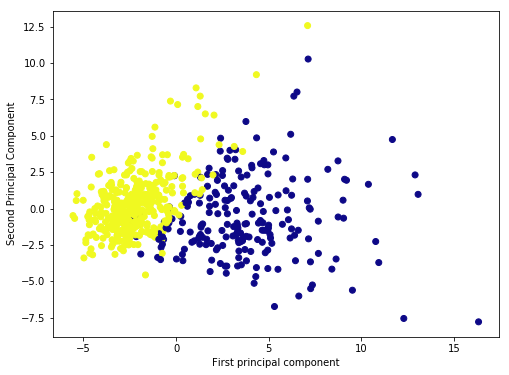

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [17]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [42]:
pca1 = PCA(n_components=4)
pca1.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [43]:
x_pca1 = pca1.transform(scaled_data)

In [44]:
scaled_data.shape

(569, 30)

In [45]:
x_pca1.shape

(569, 4)

In [46]:
df1 = pd.DataFrame(x_pca1)

In [47]:
df1.head()

,0,1,2,3
0,9.192837,1.948583,-1.123166,3.633732
1,2.387802,-3.768172,-0.529292,1.118265
2,5.733896,-1.075174,-0.551748,0.912082
3,7.122953,10.275589,-3.232789,0.152548
4,3.935302,-1.948072,1.389767,2.940640


In [50]:
df1.columns = ['pca0', 'pca1','pca2','pca3']

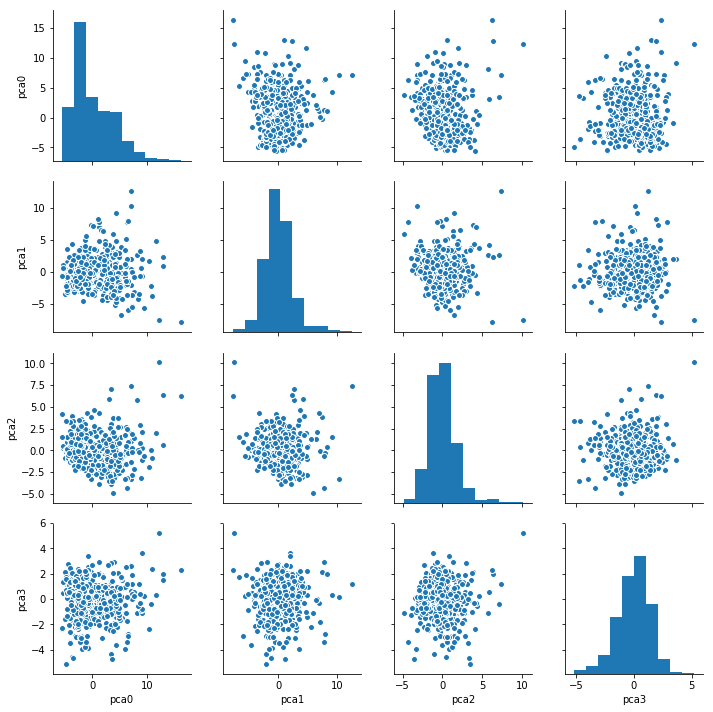

In [51]:
sns.pairplot(df1)

In [52]:
df1.shape

(569, 4)

In [53]:
cancer['target'].shape

(569,)

In [55]:
df1['target'] = cancer['target']

In [56]:
df1

,pca0,pca1,pca2,pca3,target
0,9.192837,1.948583,-1.123166,3.633732,0
1,2.387802,-3.768172,-0.529292,1.118265,0
2,5.733896,-1.075174,-0.551748,0.912082,0
3,7.122953,10.275589,-3.232789,0.152548,0
4,3.935302,-1.948072,1.389767,2.940640,0
5,2.380247,3.949929,-2.934877,0.941037,0
6,2.238883,-2.690031,-1.639913,0.149340,0
7,2.143299,2.340244,-0.871947,-0.127042,0
8,3.174924,3.391813,-3.119986,-0.601298,0
9,6.351747,7.727174,-4.341916,-3.375202,0


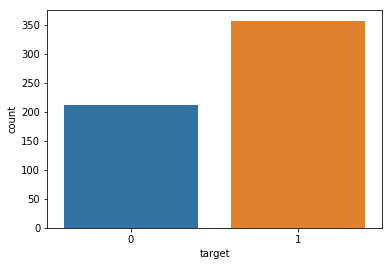

In [60]:
sns.countplot('target',data=df1)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import StandardScaler

In [92]:

X = df1.ix[:, df1.columns != 'target']
y = df1['target'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
log = LogisticRegression(C=10)
log.fit(X_train,y_train)
pred = log.predict(X_test)
print ("Number of 1 - ",y_test[y_test == 1].count())
print ("Number of 0 - ",y_test[y_test == 0].count())
print (confusion_matrix(pred,y_test))
print (classification_report(pred,y_test))

Number of 1 -  105
Number of 0 -  66
[[ 59   2]
 [  7 103]]
             precision    recall  f1-score   support

          0       0.89      0.97      0.93        61
          1       0.98      0.94      0.96       110

avg / total       0.95      0.95      0.95       171



In [95]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [96]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [98]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)
grid_pred = grid.predict(X_test)
print( "Number of 1 (in real) - ",y_test[y_test == 1].count())
print ("Number of 0 (in real)- ",y_test[y_test == 0].count())
print ("best params - ",grid.best_params_) 
print(confusion_matrix(grid_pred,y_test))
print(classification_report(grid_pred,y_test))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.631578947368421, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6363636363636364, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.924812030075188, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9473684210526315, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9696969696969697, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...............................

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.6616541353383458, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV]  C=1, gamma=0.0001, kernel=rbf, score=0.6818181818181818, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.8721804511278195, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.9323308270676691, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV]  C=10, gamma=1, kernel=rbf, score=0.9318181818181818, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.924812030075188, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV]  C=10, gamma=0.1, kernel=rbf, score=0.9624060150375939, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf ...................

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.5s finished


In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test) 
print ("Number of 1 - ",y_test[y_test == 1].count())
print ("Number of 0 - ",y_test[y_test == 0].count())
print(confusion_matrix(pred,y_test))
print(classification_report(pred,y_test))

Number of 1 -  105
Number of 0 -  66
[[62  9]
 [ 4 96]]
             precision    recall  f1-score   support

          0       0.94      0.87      0.91        71
          1       0.91      0.96      0.94       100

avg / total       0.92      0.92      0.92       171

